In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error
import seaborn as sns

In [49]:
df=pd.read_csv("C:\\Users\\ASUS\\Desktop\\Matchine learning\\winequality.csv")

In [50]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [51]:
#duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [52]:
duplicate_df=df[df.duplicated()]

In [53]:
duplicate_df.shape

(240, 12)

In [54]:
duplicate_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [55]:
df=df.drop_duplicates()
df.shape

(1359, 12)

## EDA

### Boxplot

<AxesSubplot:>

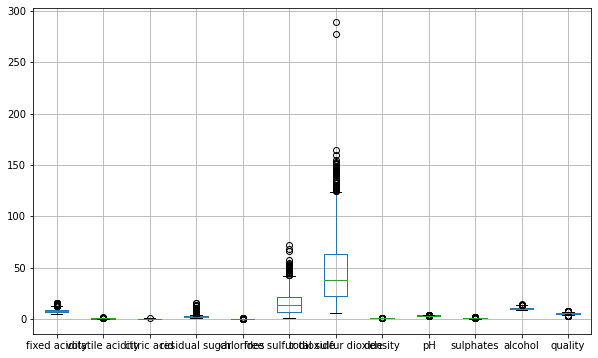

In [57]:
df.boxplot(figsize=(10,6))

In [47]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [58]:
# Q1-1.5*IQR to Q3+1.5*IQR
o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
o_df.shape

(994, 12)

<AxesSubplot:>

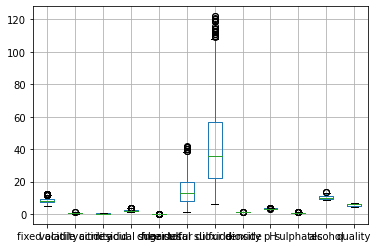

In [59]:
o_df.boxplot()

In [60]:
Q1=o_df.quantile(0.25)
Q3=o_df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity            1.900000
volatile acidity         0.243750
citric acid              0.317500
residual sugar           0.600000
chlorides                0.018000
free sulfur dioxide     12.000000
total sulfur dioxide    34.750000
density                  0.002078
pH                       0.170000
sulphates                0.150000
alcohol                  1.500000
quality                  1.000000
dtype: float64


In [61]:
o1_df=o_df[~((o_df<(Q1-1.5*IQR)) | (o_df> (Q3+1.5*IQR))).any(axis=1)]
o1_df.shape

(882, 12)

<AxesSubplot:>

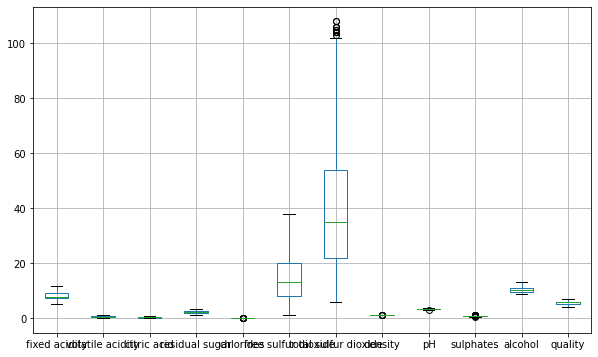

In [63]:
o1_df.boxplot(figsize=(10,6))

### Histogram

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

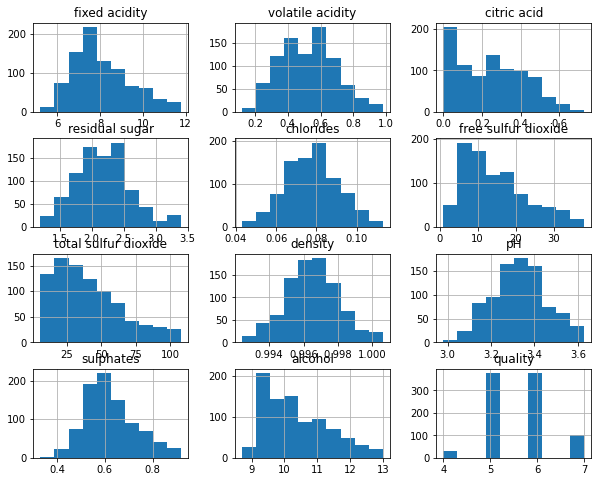

In [70]:
o1_df.hist(figsize=(10,8))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

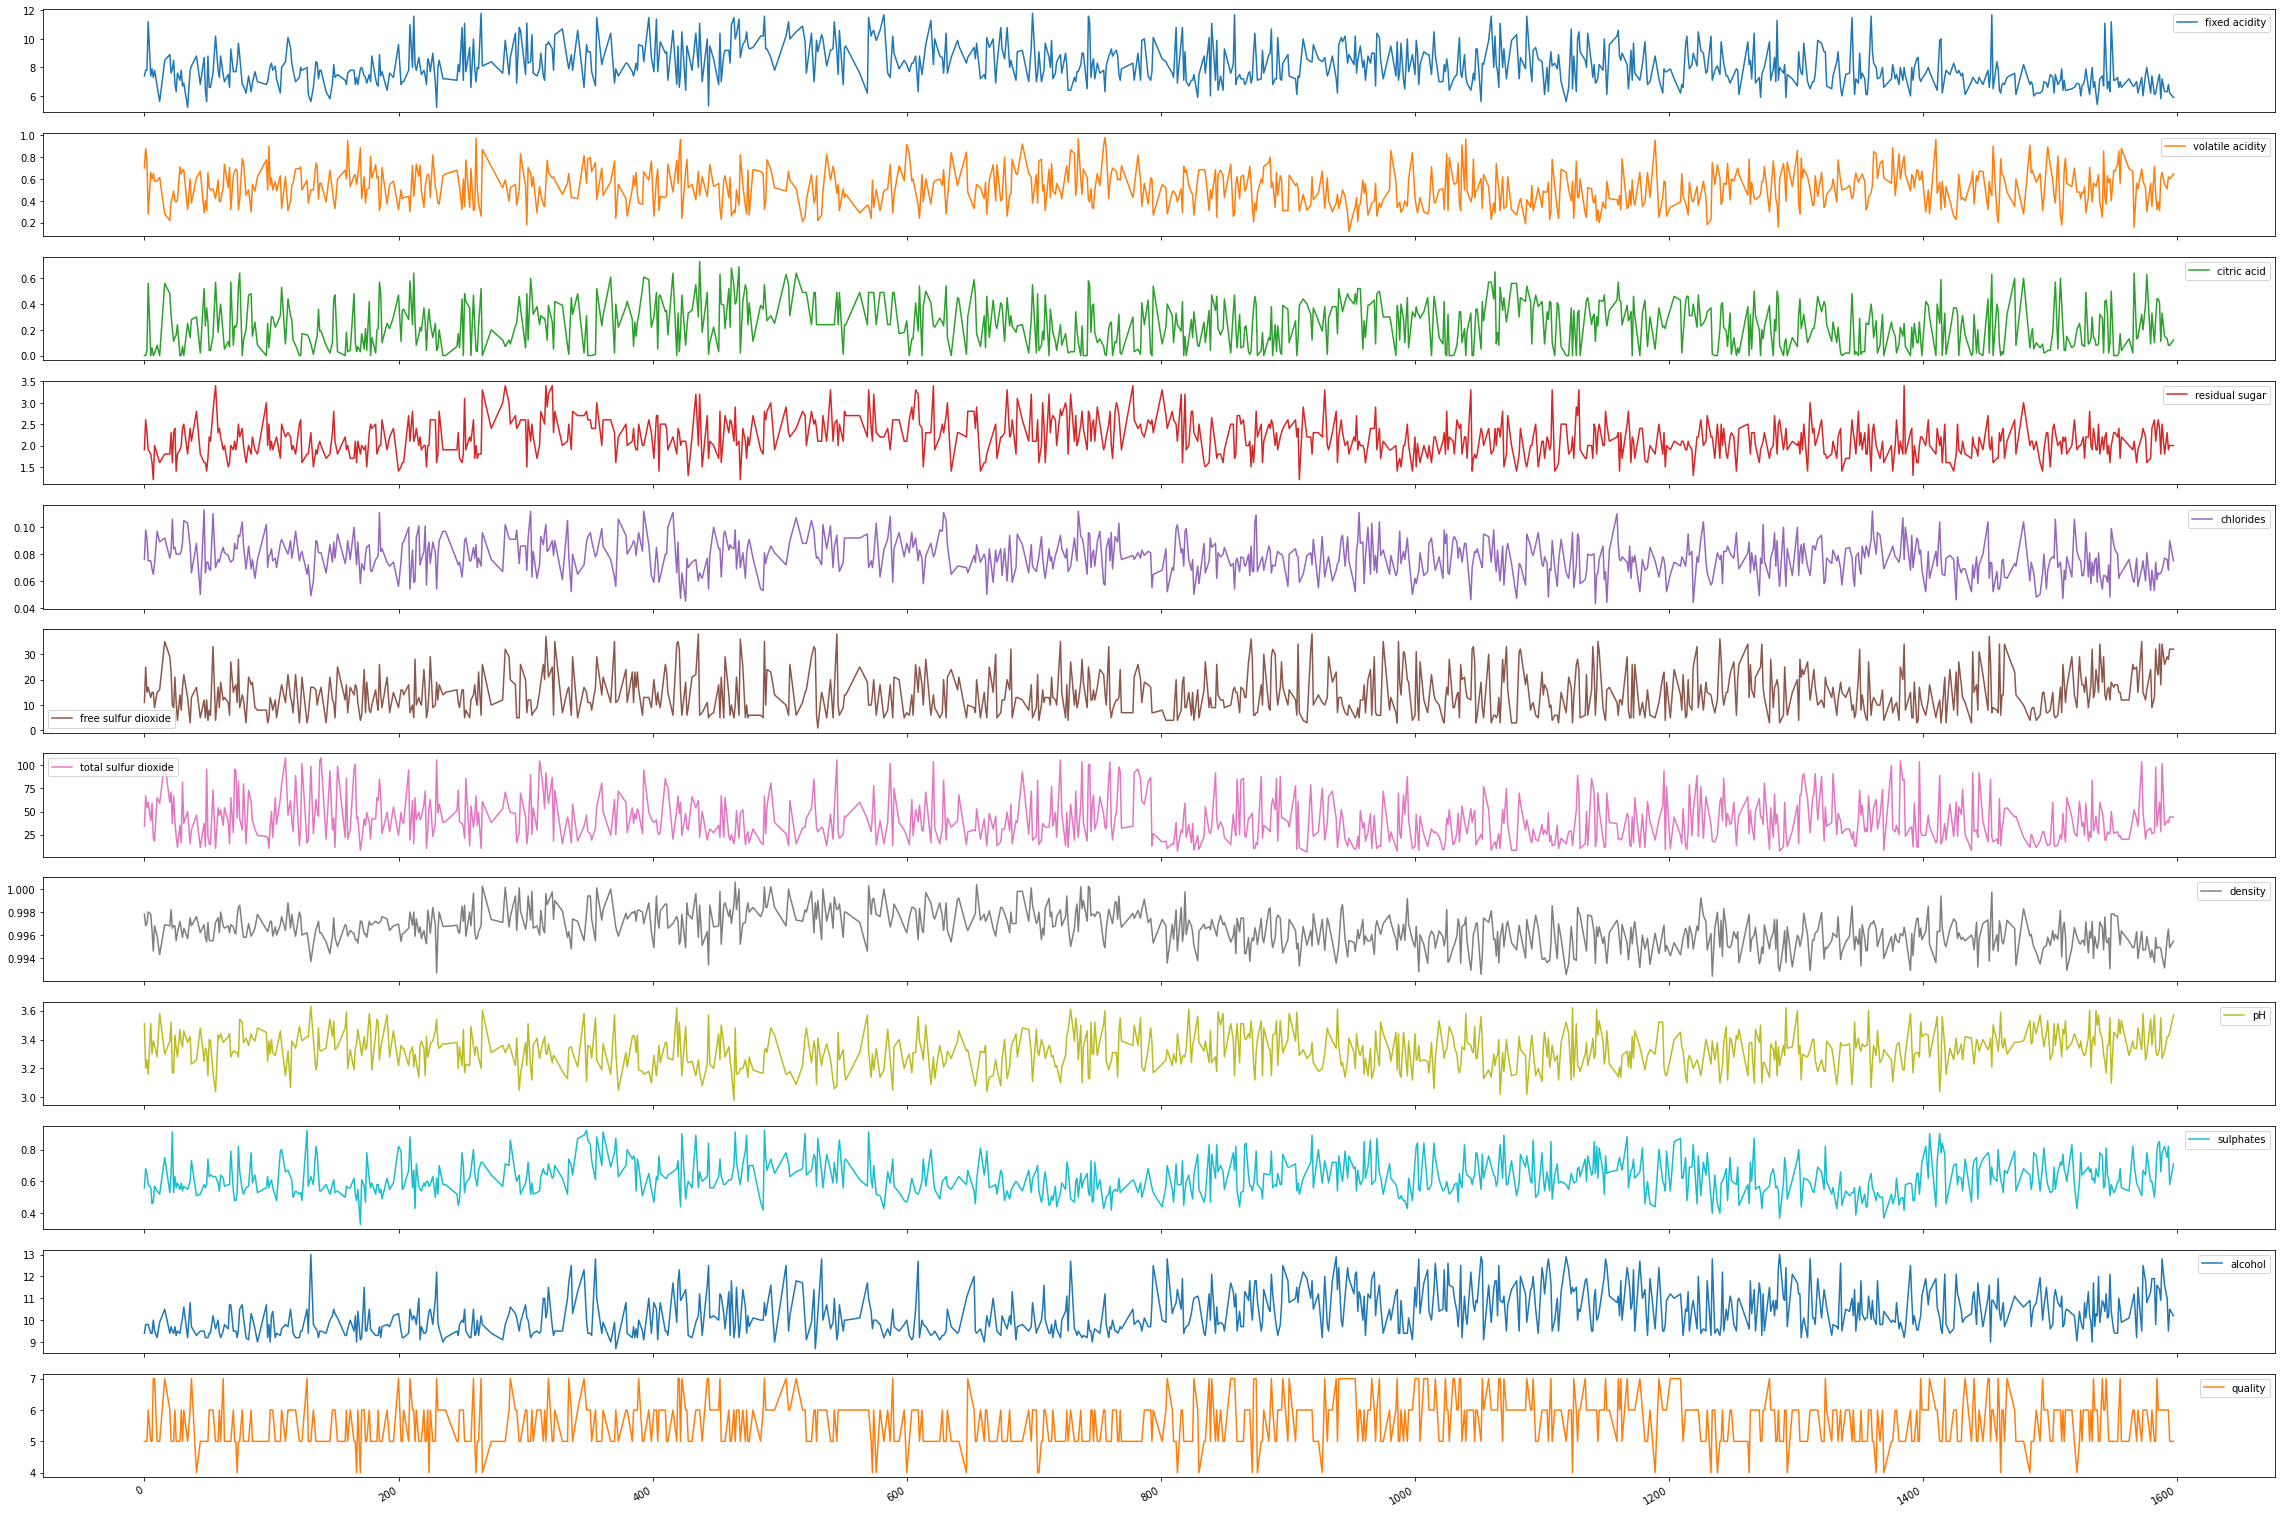

In [72]:
o1_df.plot(subplots=True,figsize=(40,30))

### Correlation

In [73]:
o1_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.268792,0.627664,0.216348,0.167672,-0.130535,-0.071495,0.567089,-0.682210,0.198029,-0.009136,0.136451
volatile acidity,-0.268792,1.000000,-0.653524,0.046388,0.130184,-0.006115,0.085065,0.073726,0.222788,-0.335261,-0.232183,-0.359251
citric acid,0.627664,-0.653524,1.000000,0.111626,0.045696,-0.053803,0.018278,0.241535,-0.455623,0.300216,0.156771,0.236930
residual sugar,0.216348,0.046388,0.111626,1.000000,0.232810,0.101620,0.189206,0.379930,-0.034945,0.051317,0.118109,0.008917
chlorides,0.167672,0.130184,0.045696,0.232810,1.000000,0.060051,0.244540,0.414029,-0.144269,-0.096923,-0.302609,-0.188359
free sulfur dioxide,-0.130535,-0.006115,-0.053803,0.101620,0.060051,1.000000,0.640808,0.013260,0.136787,0.090620,-0.037902,-0.006109
total sulfur dioxide,-0.071495,0.085065,0.018278,0.189206,0.244540,0.640808,1.000000,0.190622,0.019752,-0.068757,-0.268084,-0.191310
density,0.567089,0.073726,0.241535,0.379930,0.414029,0.013260,0.190622,1.000000,-0.195004,0.085149,-0.557483,-0.202778
pH,-0.682210,0.222788,-0.455623,-0.034945,-0.144269,0.136787,0.019752,-0.195004,1.000000,-0.012777,0.097908,-0.070156
sulphates,0.198029,-0.335261,0.300216,0.051317,-0.096923,0.090620,-0.068757,0.085149,-0.012777,1.000000,0.259396,0.449514


### Heatmap

<AxesSubplot:>

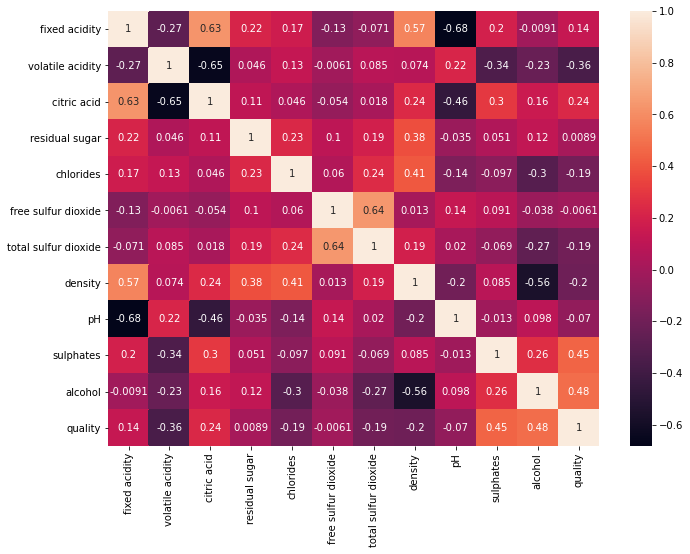

In [75]:
plt.figure(figsize=(11,8))
sns.heatmap(o1_df.corr(),annot=True)

#### From obove heatmap there is alcohol and sulphates are correlated with quality.And quality is negative correlated with others attributes

### Pairplot

<Figure size 6480x2880 with 0 Axes>

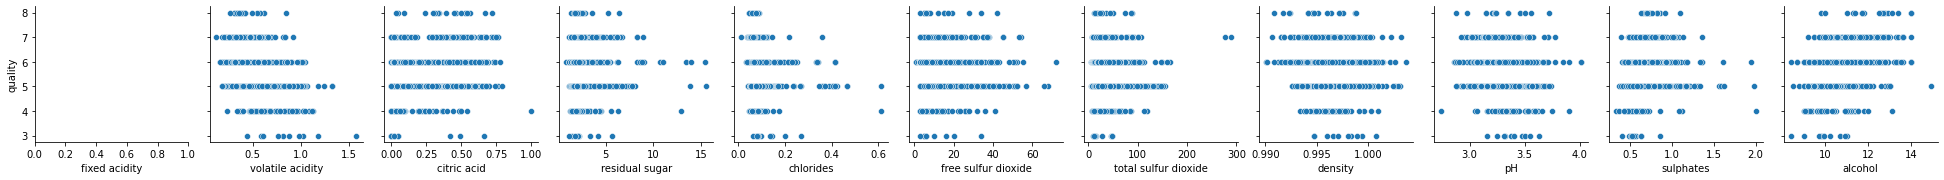

In [163]:
plt.figure(figsize=(90,40))
sns.pairplot(x_vars=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],y_vars=["quality"],data=df)

In [77]:
x=o1_df.drop(columns="quality")
y=o1_df["quality"]

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [66]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1585,7.2,0.39,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5
768,7.1,0.59,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.7
924,8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
1216,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5
1317,9.9,0.44,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9


### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [81]:
ypred=model.predict(xtest)

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [83]:
mse=mean_squared_error(ytest,ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,ypred)
print("MAE:",mae)
score=r2_score(ytest,ypred)
print("R-squared :",score)

MSE: 0.30126735582635933
RMSE: 0.5488782704993516
MAE: 0.4417146167761851
R-squared : 0.3736506501823932


In [84]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(xtrain)
mm_xtrain=mm.transform(xtrain)
mm_xtest=mm.transform(xtest)

In [85]:
model=LinearRegression()
model.fit(mm_xtrain,ytrain)

LinearRegression()

In [86]:
mm_ypred=model.predict(mm_xtest)

In [87]:
mse=mean_squared_error(ytest,mm_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,mm_ypred)
print("MAE:",mae)
score=r2_score(ytest,mm_ypred)
print("R-squared :",score)

MSE: 0.30126735582635894
RMSE: 0.5488782704993512
MAE: 0.4417146167761849
R-squared : 0.3736506501823941


### Polynomial Regression

In [112]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2) 
poly_features=pf.fit_transform(xtrain)
poly_features

array([[  1.    ,   7.2   ,   0.39  , ...,   0.7056,   9.66  , 132.25  ],
       [  1.    ,   7.1   ,   0.59  , ...,   0.2809,   5.141 ,  94.09  ],
       [  1.    ,   8.6   ,   0.47  , ...,   0.64  ,   8.96  , 125.44  ],
       ...,
       [  1.    ,   7.6   ,   0.5   , ...,   0.3844,   7.13  , 132.25  ],
       [  1.    ,   9.3   ,   0.5   , ...,   0.5929,   8.316 , 116.64  ],
       [  1.    ,   7.3   ,   0.44  , ...,   0.3249,   6.669 , 136.89  ]])

In [113]:
model=LinearRegression()
model.fit(poly_features,ytrain)

LinearRegression()

In [114]:
pf_ypred=model.predict(pf.fit_transform(xtest))

In [115]:
mse=mean_squared_error(ytest,pf_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,pf_ypred)
print("MAE:",mae)
score=r2_score(ytest,pf_ypred)
print("R-squared :",score)

MSE: 0.8565125028225219
RMSE: 0.9254796069187705
MAE: 0.7252421832192537
R-squared : -0.7807307658077132


### Ridge and Lasso Regression

In [123]:
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model  import Ridge
from sklearn.linear_model  import Lasso
#Linear Model
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print("LR Coefficients:",lr.coef_)

LR Coefficients: [-7.90733198e-04 -9.01316745e-01 -4.69365221e-01 -7.80568461e-02
 -3.33413591e+00  4.87826776e-03 -2.25846213e-03  2.32308827e+01
 -6.65572817e-01  2.08713434e+00  2.76805652e-01]


In [124]:
#Ridge Model 
ridge=Ridge(alpha=0.1)
ridge.fit(xtrain,ytrain)
print("Ridge Coefficients:",ridge.coef_)

Ridge Coefficients: [ 0.01659361 -0.89115026 -0.45140964 -0.06446014 -1.49521841  0.00508753
 -0.00244517  0.04023496 -0.5419948   2.09965043  0.25989432]


In [125]:
#Lasso Model
lasso=Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
print("Lasso Coefficients:",lasso.coef_)

Lasso Coefficients: [ 0.01761767 -0.          0.         -0.         -0.          0.0107274
 -0.00557465 -0.         -0.          0.          0.21153209]


### Result on Training and Testing Dataset

In [126]:
print('Linear Regression on training data',lr.score(xtrain,ytrain))
print('Linear Regression on testing data',lr.score(xtest,ytest))
print('Ridge Regression on training data',ridge.score(xtrain,ytrain))
print('Rigde Regression on testing data',ridge.score(xtest,ytest))
print('Lasso Regression on training data',lasso.score(xtrain,ytrain))
print('Lasso Regression on testing data',lasso.score(xtest,ytest))

Linear Regression on training data 0.38438752061280923
Linear Regression on testing data 0.3736506501823932
Ridge Regression on training data 0.383347172724535
Rigde Regression on testing data 0.3829272780307098
Lasso Regression on training data 0.21212513992336268
Lasso Regression on testing data 0.2586529067269081


### Polynomial Regression

In [158]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
poly_xtrain=pf.fit_transform(xtrain)
poly_xtest=pf.fit_transform(xtest)

In [159]:
#Linear Model
lr=LinearRegression()
lr.fit(poly_xtrain,ytrain)
print("LR Coefficients:",lr.coef_)

LR Coefficients: [-1.93934328e-06  1.06582930e+00 -1.79314358e-01 ...  2.65788598e+00
  1.28466636e-01  2.97734680e-02]


In [160]:
#Ridge Model 
ridge=Ridge(alpha=0.1)
ridge.fit(poly_xtrain,ytrain)
print("Ridge Coefficients:",ridge.coef_)

Ridge Coefficients: [ 0.          0.00024087  0.0001708  ... -0.00641149 -0.00514787
  0.00514687]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [161]:
#Lasso Model
lasso=Lasso(alpha=0.1)
lasso.fit(poly_xtrain,ytrain)
print("Lasso Coefficients:",lasso.coef_)

Lasso Coefficients: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
  0.00000000e+00 -5.78952908e-05]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96.29817673118627, tolerance: 0.03600242057488653
  model = cd_fast.enet_coordinate_descent(


### Result on Training and Testing Dataset

In [162]:
print('Linear Regression on training data',lr.score(poly_xtrain,ytrain))
print('Linear Regression on testing data',lr.score(poly_xtest,ytest))
print('Ridge Regression on training data',ridge.score(poly_xtrain,ytrain))
print('Rigde Regression on testing data',ridge.score(poly_xtest,ytest))
print('Lasso Regression on training data',lasso.score(poly_xtrain,ytrain))
print('Lasso Regression on testing data',lasso.score(poly_xtest,ytest))

Linear Regression on training data 0.9999999999999997
Linear Regression on testing data -277.469139734482
Ridge Regression on training data 0.6652917911516112
Rigde Regression on testing data -0.8023635723543696
Lasso Regression on training data 0.49208036453455994
Lasso Regression on testing data 0.2535862112458145


### ElasticNet on data

In [168]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [169]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

In [170]:
scores={}
for i in alpha:
    model=ElasticNet(alpha=i)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(ytest,ypred)
    scores[i]=model.score(xtest,ytest)
    print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(xtest,ytest),mse,rmse,mae))

 For Alpha = 0.0001 | R-square :0.38048961472372544 MSE :0.29797788683504106 RMSE :0.5458735080905109 MAE:0.43920410638306157 
 For Alpha = 0.001 | R-square :0.39199984053430414 MSE :0.29244159100280764 RMSE :0.5407786894865659 MAE:0.43576850927791255 
 For Alpha = 0.01 | R-square :0.3921723512316446 MSE :0.29235861519760453 RMSE :0.5407019652244706 MAE:0.44186044811653935 
 For Alpha = 0.1 | R-square :0.291819508296114 MSE :0.34062726215899936 RMSE :0.5836328144981221 MAE:0.48779349014673257 
 For Alpha = 0.3 | R-square :0.18948529727249397 MSE :0.3898489260349823 RMSE :0.624378832148386 MAE:0.5321128887518689 
 For Alpha = 0.5 | R-square :0.087433002362576 MSE :0.43893499126754904 RMSE :0.6625216911675791 MAE:0.5709642672521658 
 For Alpha = 1 | R-square :0.038236683601233334 MSE :0.46259789580147465 RMSE :0.6801454960532155 MAE:0.5906747283417484 
 For Alpha = 10 | R-square :-0.011958541461159156 MSE :0.48674126361060477 RMSE :0.6976684481977129 MAE:0.6195672264017908 


In [171]:
scores

{0.0001: 0.38048961472372544,
 0.001: 0.39199984053430414,
 0.01: 0.3921723512316446,
 0.1: 0.291819508296114,
 0.3: 0.18948529727249397,
 0.5: 0.087433002362576,
 1: 0.038236683601233334,
 10: -0.011958541461159156}

In [172]:
#get the max score and its key
max(scores, key= lambda x: scores[x])

0.01

In [173]:
model.intercept_

5.641452344931921

In [174]:
ypred=model.predict(xtest)

In [175]:
model.score(xtest,ytest)

-0.011958541461159156

In [176]:
mean_squared_error(ytest,ypred)

0.48674126361060477

In [177]:
mean_absolute_error(ytest,ypred)

0.6195672264017908

### ElasticNetCV on data

In [134]:
from sklearn.linear_model import ElasticNetCV

In [136]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

In [137]:
model= ElasticNetCV(alphas=alpha,cv=5)
model.fit(xtrain,ytrain)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1, 10], cv=5)

In [138]:
model.alpha_

0.0001

In [139]:
model.intercept_

4.201972305891145

In [140]:
ypred=model.predict(xtest)

In [141]:
model.score(xtest,ytest)

0.38048961472372544

In [142]:
mean_squared_error(ytest,ypred)

0.29797788683504106

In [143]:
mean_absolute_error(ytest,ypred)

0.43920410638306157